In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cancer = pd.read_csv('haberman.csv') #creating data frame to store data of cancer survival patients

In [9]:
print(cancer.shape)

(305, 4)


Here we have 305 rows that is we have 305 datapoints and 4 columns that is we have 4 features

In [10]:
print(cancer.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


The above code prints what is heading of every columns.
'30' corresponds to Age of Patient when he has undergone operation.
'64' corresponds to operation year (1900).
'1' corresponds to number of positive axillary nodes.
'1.1' corresponds to survival status of patients.
    where 1 represents patient has survived for 5 years or longer.
    and 2 represents patient died within 5 years.

In [12]:

cancer = cancer.rename(columns={'30': 'age', '64': 'year','1':'a_nodes','1.1':'surv_stat'}) #renaming column names
cancer

,age,year,a_nodes,surv_stat
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [14]:
cancer.groupby('surv_stat').count()
# here we are getting number of classes


,age,year,a_nodes
surv_stat,,,
1,224,224,224
2,81,81,81


The column surv_stat is responsible for getting class label
there are 2 classes
1 is label for people who survived cancer for 5 or more than 5 years
2 is label for people who died within 5 years

In [15]:
cancer['surv_stat'].value_counts() # getting count of each label namely getting number of data points per class

1    224
2     81
Name: surv_stat, dtype: int64

We are getting 224 data points for label 1 and we are getting 81 data points for label 2 .
This is an example of Unbalanced data set as number of data points in both classes are having large difference

# Objective
Given Features like Age , Operation Year and Number of Positive Axillary Nodes , We have to predict whether the patient belongs to class label 1 or class label 2.
In a Nutshell we have to predict whether patient is a cancer Surviver or is a cancer Victim.

# Univariate Analysis
Using this technique we are finding which features would be useful towards our classification

E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


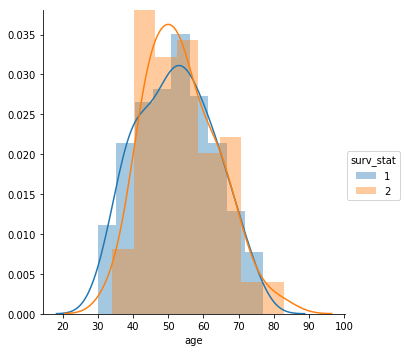

In [19]:
sns.FacetGrid(cancer, hue="surv_stat", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();
# Plotting Histogram for age


Using above Histogram we can make following conclusions that can be useful for classification
1) Between age 40-60 there are roughly 0.3 % of people who survived cancer
2) Between age 40-60 there are roughly 0.35 % of people who cannot survived cancer
3) From age 60 onwards histogram of both labels are almost overlapping
Hence we cannot use age as useful feature towards classification as it does not provide well separated probability distribution functions

E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


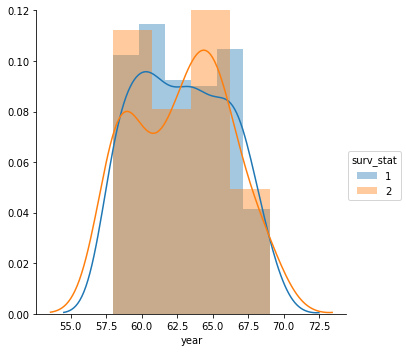

In [20]:
sns.FacetGrid(cancer, hue="surv_stat", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();
# Plotting Histogram for operation year

Here also we see that between year 1955 & 1957 the histogram overlaps
Moreover this also happens between the year 1965 to 1972
Hence we cannot Use operation year feature for classification

E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


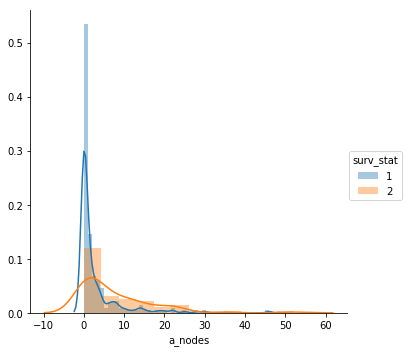

In [21]:
sns.FacetGrid(cancer, hue="surv_stat", size=5) \
   .map(sns.distplot, "a_nodes") \
   .add_legend();
plt.show();

# Some Quick Observation That can be made by looking at the Histogram are
1) When active axillary nodes count is 0 , 30 % of people survived cancer and 5 % of people could not survive cancer.
2) When active axillary nodes count is roughly 10 , approximately 1-2 % of people survived cancer and 7-8 % of people could not survive cancer.
3) When active axillary nodes count is greater than 20 we all people fall in the region of cancer victims that is label 2
Hence we see that count of active axillary nodes is in direct proportion to probability of beign cancer victim.
That is Higher count of active axillary nodes more is the likelihood of belonging to class label 2 and Vice Versa
"Thus Count of Active axillary nodes is important feature towards classification in Habermann dataset"

# Simple if else model using active axillary node counts as feature
If we were to build a simple model using if else statements it would look like this
if(a_nodes>=0 && a_nodes <= 5):
    then '1' 
else:
    '2'
the above model wont be 100 % accurate it would misclassify 1 as 2 in some cases .  

In [23]:
cancer_s = cancer.loc[cancer["surv_stat"] == 1]; 
cancer_ns = cancer.loc[cancer["surv_stat"] == 2];
# storing values in data frame of survivors and non survivors for computing cdf

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]


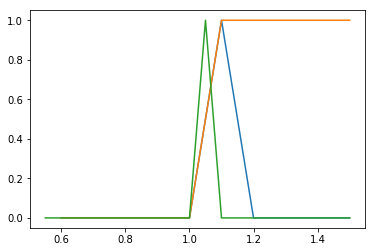

In [34]:
counts, bin_edges = np.histogram(cancer_s['surv_stat'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(cancer_s['surv_stat'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15
 1.2  1.25 1.3  1.35 1.4  1.45 1.5 ]


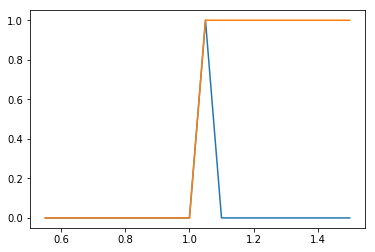

In [38]:
counts, bin_edges = np.histogram(cancer_s['surv_stat'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

# Observations from cdf
Here observing cdf alone is bit cubersome because of nature of data set it is better that we derive required results using box and violin plots .

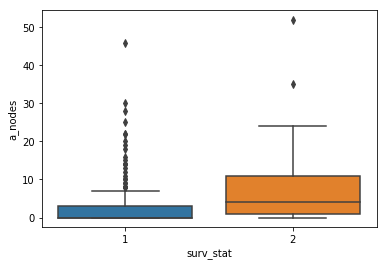

In [39]:
sns.boxplot(x = 'surv_stat',y='a_nodes',data = cancer)
plt.show()

Following observations can be made by seeing above box plots
1. For label 1 that is survivors 75th percentile is roughly between 4 to 5 , Hence we can use 5 as threshold. 
2. However 25 th percentile of label 2 that is non survivors starts roughly at 4
Hence if we use following if else conditions
if(a_nodes >= 0 and a_nodes <= 5):
    then '1'
else:
    '2'
We would be getting roughly 25 to 30 % of error as we would be mis classifying some non survivors(label 2) as survivors(label 1)

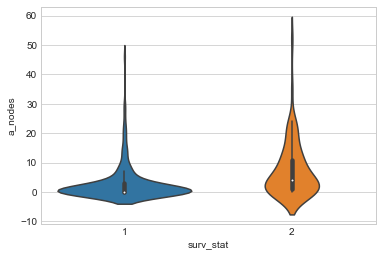

In [43]:
sns.violinplot(x="surv_stat", y="a_nodes", data=cancer, size=8)
plt.show()

# Observations from Violin Plot
1) The Pdf is not gaussian distribution it is skewed.
2) when active axil nodes count is 0 probability of being survivor is highest that is but being a non survivor is still considerable.
3) As count of active axil nodes increases probability of being survivor that is falling in label 1 decreases drastically after node count hits 20 value probability of being survivor almost becomes 0.
4) As long as node count is there between 10 to 30 there is very strong probability of being a non survivor that is label2

# Pair and Scatter Plots
We have understood by observation that count of active axillary nodes is one of the most important feature for classification , however we could still improve our model by considering other features along with it like age and operation year

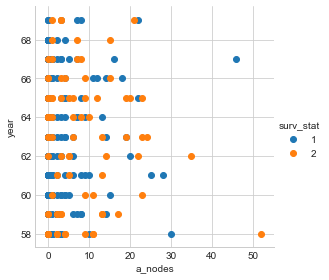

In [40]:
sns.set_style("whitegrid");
sns.FacetGrid(cancer,hue='surv_stat',size=4)\
   .map(plt.scatter,'a_nodes','year')\
   .add_legend()
plt.show()

One improvement we can do over our original model which was just based on axil_nodes here is that we can use operation year also 
along with active axil nodes count , from plot we can see that
1) If operation is done prior to 1960 mostly person falls in label 2.
2) If operation is done after 1960 then we have to look at count of active axillary nodes 
3) if active_nodes count is between 0 and 5 then person falls under survivor category that is label 1 else he falls in non survivor category that is label 2
there are large number of fare exceptions to above observation hence operation year and count of active nodes may not be correct choice for classification alone ,hence we go for pair plots

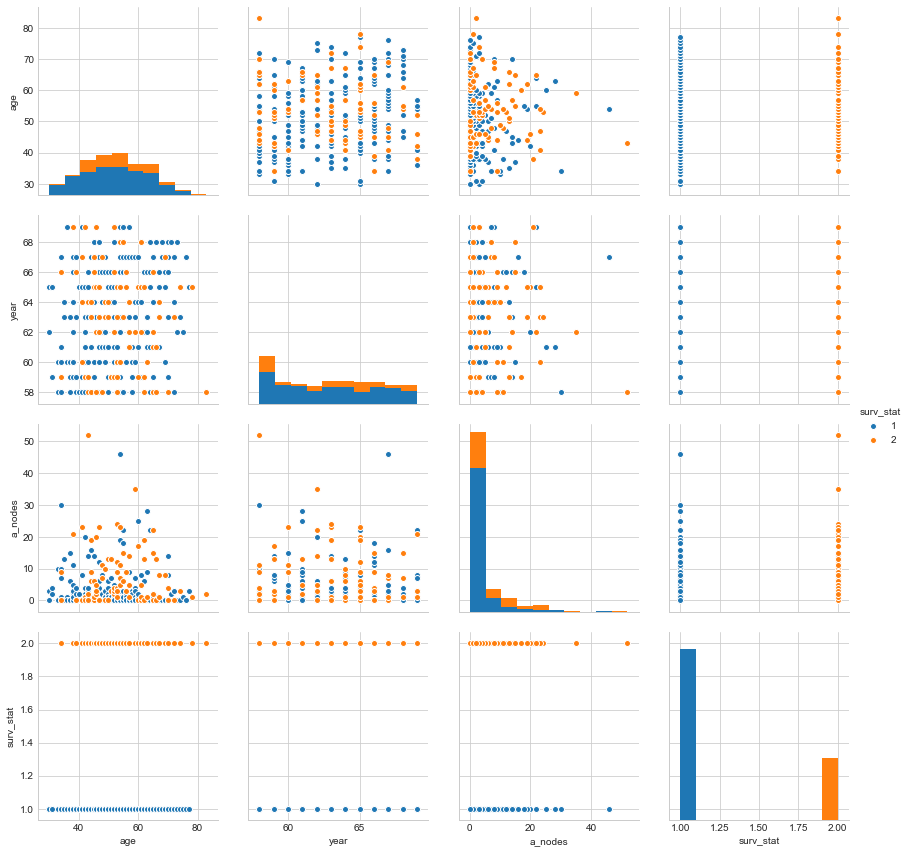

In [41]:
plt.close(); #pair plots
sns.set_style("whitegrid");
sns.pairplot(cancer, hue="surv_stat", size=3);

plt.show()

# Observations from pair plots
If we observe pair plot of age and active axil nodes count carefully we will see that it provides us the best classification for label 1 and label 2.
We can make the following observation
1) If person has age less than or equal to 40(at time of operation) then he is survivor in most of the cases that is label 1
2) If person has age between 40 and 60(at time of operation) then he has got high probablitiy (60-70%) of being survivor if count of active axillary nodes is less than 5
3) else if it is neither of this cases unfortunately there is high probability(80-90%) that he is unlucky and he is not a survivor that is he will die within 5 years of opertion hence label 2

# Simple if else model based on above observations
if((age<=40):
    then '1'
else if((age>40 && age <=60) &&(a_node<=5)) :
     '1'
else:
    then '2'
This model wont be 100 % correct it will fail when some people are extremely unlucky example some people have age less than 40 and axilnodes count as 0 still they fall under label 2 that is non survivor category and some who are extremely lucky example in above pair plots there is  person having age 65 and count of axil nodes as 25 which is fairly large , but then also he was a survivor

# Conclusions.
1. Count of active axillary nodes is necessary feature for classification of cancer survivours and cancer non survivors.
2. Count of active axillary nodes along with age can provide reasonable accuracy however sometimes exception may still be there.
3. If operation is done prior to age of 40 then patient has got high probability of living upto 5 years more and more than that.
4. Count of Active Axil Nodes is critical towards patient being cancer victim or cancer survival.
5. If Active Nodes count is less than or equal to 5 it must be controlled immediately , Nodes count of 20 is mostly lethal and person having count more than that will most probably die within next 5 years.
6. There are some exceptions typically 2 - 3 that don't follow above conditions
example : a) A Person was having axil nodes count = 0 and age less than 40 and still didnt survive.
          b) A Person was having axil nodes count = 45 and age nearly 55 and surprisingly survived 